In [1]:
import json

# 1. Read the JSON File
with open("yahoo_health1.json", "r") as f:
    data = json.load(f)

# 2. Examine the Structure
if isinstance(data, list):
    print(f"The JSON data is a list with {len(data)} items.")
elif isinstance(data, dict):
    print(f"The JSON data is a dictionary with the following keys: {list(data.keys())}")

# 3. Extract Information (this is a placeholder, it needs to be tailored to your needs)
# For instance, if it's a list of dictionaries and you want to know unique values for a key:
if isinstance(data, list) and all(isinstance(item, dict) for item in data):
    key_of_interest = "some_key"  # Replace with a key from your data
    unique_values = set(item[key_of_interest] for item in data if key_of_interest in item)
    print(f"Unique values for '{key_of_interest}': {unique_values}")

The JSON data is a list with 278941 items.
Unique values for 'some_key': set()


In [2]:
import pandas as pd

# Convert the list of dictionaries (if that's the structure) into a pandas DataFrame
df = pd.DataFrame(data)

# Check the first few rows to get an overview of the data
initial_data_overview = df.head()

# Check for missing values in each column
missing_values = df.isnull().sum()

initial_data_overview, missing_values


(       uri                                            subject  \
 0  2530378             What is Trans Fat? How to reduce that?   
 1  4154469                                 What is happiness?   
 2  3721162                               Treatments for Gout?   
 3   712533  I want to drink 8 glasses of water everyday as...   
 4  3693976      How effective is massage in relieving stress?   
 
                                              content  \
 0  I heard that tras fat is bad for the body.  Wh...   
 1                                 What is happiness?   
 2  My father has gout. What are the best treatmen...   
 3  I feel very bloated after only 3 glasses. What...   
 4      How effective is massage in relieving stress?   
 
                                           bestanswer  \
 0  Trans fats occur in manufactured foods during ...   
 1         there is a good wikipedia article on this.   
 2  there is no cure for gout but it can be treate...   
 3  Try using a squeeze bottle

In [3]:
# Determine columns to drop based on a threshold of missing values
threshold = 0.2  # 20% threshold
columns_to_drop = missing_values[missing_values > threshold * len(df)].index.tolist()

# Drop the columns from the DataFrame
cleaned_df = df.drop(columns=columns_to_drop)

# Check the shape of the cleaned DataFrame
cleaned_df_shape = cleaned_df.shape

cleaned_df_shape, columns_to_drop


((278941, 21), ['content', 'vot_date'])

In [4]:
# Summary statistics for numerical columns
summary_statistics = cleaned_df.describe()

summary_statistics


,num_answers,num_chars_question,total_chars_answers,avg_chars_answers,num_chars_best_answer,num_chars_content
count,278941.000000,278941.000000,2.789410e+05,278941.000000,278941.000000,278941.000000
mean,6.313281,55.804944,1.569519e+03,277.121487,417.311955,126.332834
std,7.127814,27.163976,2.990600e+03,281.991552,576.618798,192.472739
min,0.000000,10.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.000000,34.000000,4.670000e+02,123.000000,99.000000,0.000000
50%,5.000000,51.000000,1.024000e+03,202.272727,238.000000,45.000000
75%,8.000000,75.000000,2.021000e+03,332.500000,490.000000,182.000000
max,2235.000000,157.000000,1.263665e+06,3988.000000,4000.000000,3995.000000


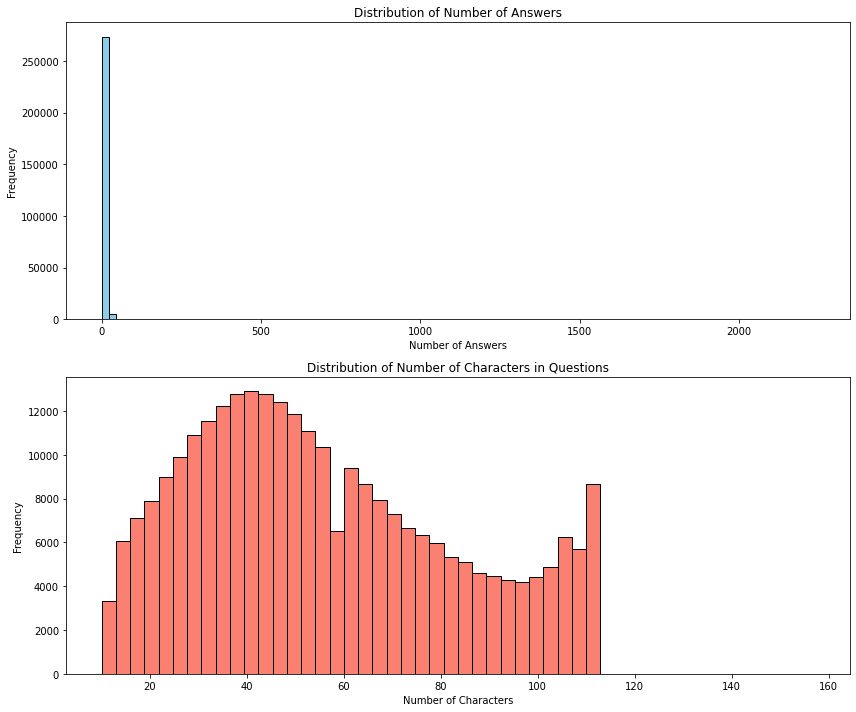

In [5]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plotting the distribution of num_answers
ax[0].hist(cleaned_df['num_answers'], bins=100, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Number of Answers')
ax[0].set_xlabel('Number of Answers')
ax[0].set_ylabel('Frequency')

# Plotting the distribution of num_chars_question
ax[1].hist(cleaned_df['num_chars_question'], bins=50, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Number of Characters in Questions')
ax[1].set_xlabel('Number of Characters')
ax[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
# Drop rows where 'cat' is "Other - Health" or "Other - Health & Beauty"
filtered_df = cleaned_df[~cleaned_df['cat'].isin(["Other - Health", "Other - Health & Beauty"])]

# Check the shape of the filtered DataFrame
filtered_df_shape = filtered_df.shape

filtered_df_shape


(242360, 21)

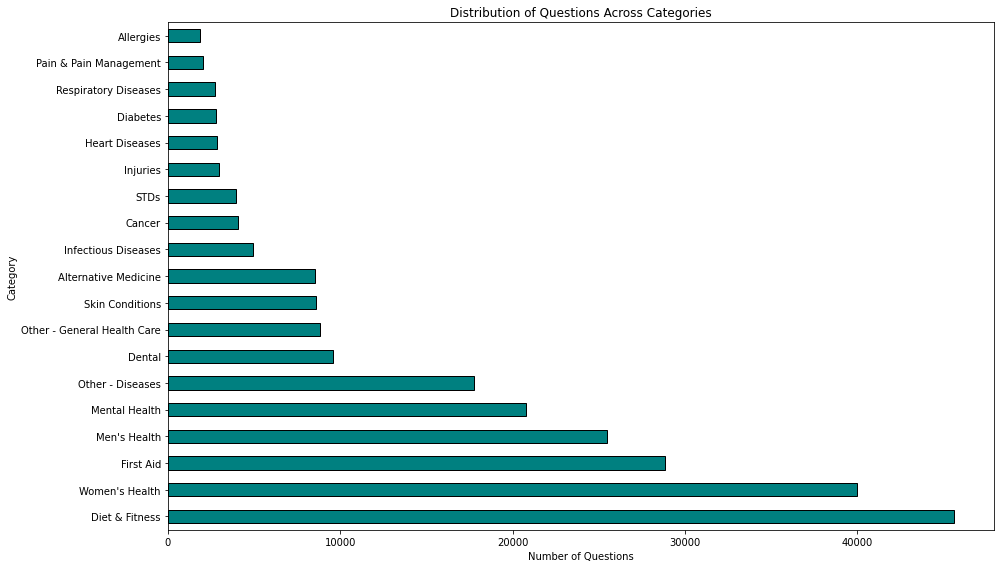

In [7]:
# Visualize the distribution of questions across different categories

# Set up the figure
plt.figure(figsize=(14, 8))

# Plotting the category distribution
category_counts = filtered_df['cat'].value_counts()
category_counts.plot(kind='barh', color='teal', edgecolor='black')

# Setting the title and labels
plt.title('Distribution of Questions Across Categories')
plt.xlabel('Number of Questions')
plt.ylabel('Category')

# Display the plot
plt.tight_layout()
plt.show()


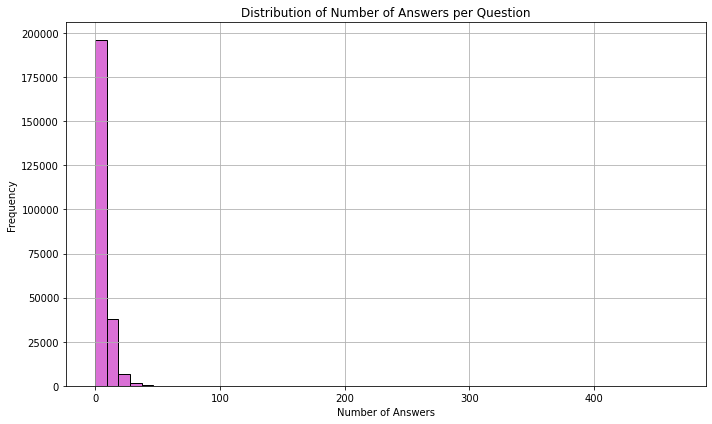

In [8]:
# Visualize the distribution of the number of answers each question receives

# Set up the figure
plt.figure(figsize=(10, 6))

# Plotting the distribution of number of answers
filtered_df['num_answers'].hist(bins=50, color='orchid', edgecolor='black')

# Setting the title and labels
plt.title('Distribution of Number of Answers per Question')
plt.xlabel('Number of Answers')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()


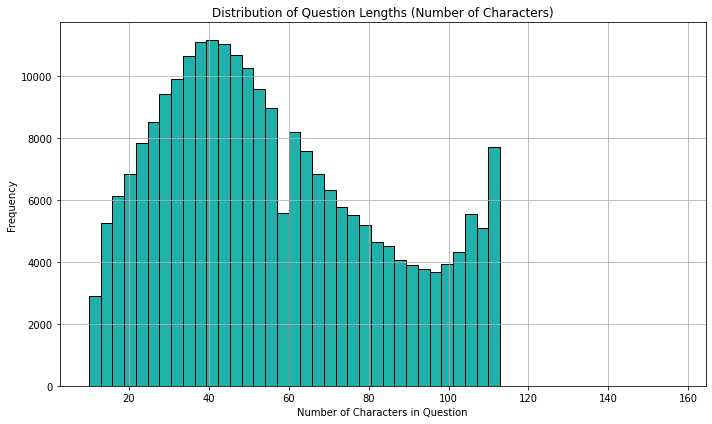

In [9]:
# Visualize the distribution of question lengths

# Set up the figure
plt.figure(figsize=(10, 6))

# Plotting the distribution of question lengths
filtered_df['num_chars_question'].hist(bins=50, color='lightseagreen', edgecolor='black')

# Setting the title and labels
plt.title('Distribution of Question Lengths (Number of Characters)')
plt.xlabel('Number of Characters in Question')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()


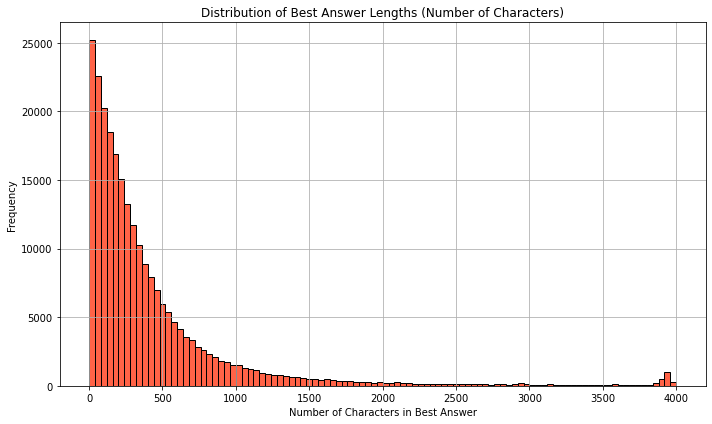

In [10]:
# Visualize the distribution of the lengths of the best answers

# Set up the figure
plt.figure(figsize=(10, 6))

# Plotting the distribution of best answer lengths
filtered_df['num_chars_best_answer'].hist(bins=100, color='tomato', edgecolor='black')

# Setting the title and labels
plt.title('Distribution of Best Answer Lengths (Number of Characters)')
plt.xlabel('Number of Characters in Best Answer')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()


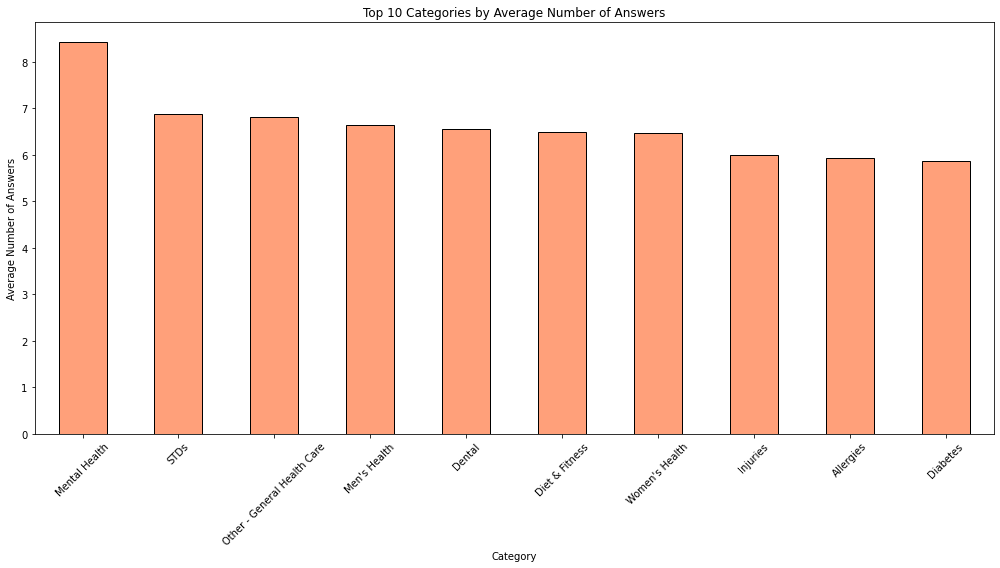

In [14]:
# Calculate average number of answers by category
avg_answers_by_category = filtered_df.groupby('cat')['num_answers'].mean().sort_values(ascending=False)

# Visualize the top categories in terms of average number of answers

# Set up the figure
plt.figure(figsize=(14, 8))

# Plotting the top categories by average number of answers
avg_answers_by_category.head(10).plot(kind='bar', color='lightsalmon', edgecolor='black')

# Setting the title and labels
plt.title('Top 10 Categories by Average Number of Answers')
plt.xlabel('Category')
plt.ylabel('Average Number of Answers')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
# Randomly sample 10 rows from the filtered dataset
random_sample = filtered_df.sample(n=10, random_state=42)

random_sample

,uri,subject,bestanswer,nbestanswers,lastanswerts,cat,maincat,subcat,date,res_date,...,qintl,language,id,best_id,num_answers,num_chars_question,total_chars_answers,avg_chars_answers,num_chars_best_answer,num_chars_content
37093,1435242,what's the best natural way to get rid of flab...,"If it's muscle that's flabby, you can tighten ...","[If it's muscle that's flabby, you can tighten...",1161068399,Men's Health,Health,Men's Health,1143805106,1144659130,...,us,en-us,u277321,u289505,4,53,331,82.750000,233,174
214067,1506500,what can be learned from this film about psych...,"To see the human side behind the label ""mental...",[That's a tough one. This movie is a great wa...,1162969037,Mental Health,Health,Mental Health,1162960587,1177028033,...,us,en-us,u1449635,u1046480,2,89,1106,553.000000,715,20
27695,556959,how long (age)a man enjoy good sexual lfe?,"Hey! As long as you can get it up, it's all good!","[Hey! As long as you can get it up, it's all g...",1161068399,Men's Health,Health,Men's Health,1140627746,1141837926,...,us,en-us,u999685,u784611,3,42,408,136.000000,49,0
30275,3239302,Does the Ontario Health Insurance Plan cover y...,"I am not 100% sure, but I seriously doubt it, ...","[I am not 100% sure, but I seriously doubt it,...",1161068399,Alternative Medicine,Health,Alternative Medicine,1140544730,1155813689,...,us,en-us,u126675,u1693647,1,58,160,160.000000,160,0
6957,4316615,Would you categorize Bulimia Nervosa with Hero...,I'm with Scorpio on this one. Addiction is de...,[I'm with Scorpio on this one. Addiction is d...,1161068399,Women's Health,Health,Women's Health,1137112767,1139101321,...,us,en-us,u1541986,u314045,2,65,2022,1011.000000,1669,139
14924,3131486,how does one stop drinking?,why stop,[To other people drinking is already a habit t...,1161068399,First Aid,Health,General Health Care,1138080471,1142555317,...,us,en-us,u393291,u340155,3,27,520,173.333333,8,0
182577,2827606,what does it mean when you dont get your perio...,"Stress, malnutrition, over-exercise, obesity c...",[Chances are its a hormonal imbalance. Are you...,1163961446,Women's Health,Health,Women's Health,1163959233,1164478389,...,us,en-us,u563117,u1804027,9,82,1093,121.444444,92,0
268841,299279,Is a 8 1/2' penis normal?,Yes it is,"[It's a little to big. I guess it's abnormal.,...",1161068399,Men's Health,Health,Men's Health,1151715447,1177598095,...,us,en-us,u1278916,u1751978,10,25,441,44.100000,9,0
41726,2718331,what should i do if the medication for high bl...,contact me direct for herbal info that can hel...,[contact me direct for herbal info that can he...,1161068399,Alternative Medicine,Health,Alternative Medicine,1141894432,1143104522,...,us,en-us,u1817212,u1333852,4,109,579,144.750000,71,0
111954,319231,What would cause one leg to be larger than the...,Its just genetics..... out of six of us kids 4...,"[You didn't give alot of info here, how do you...",1161068399,Other - Diseases,Health,Diseases & Conditions,1146932394,1173499336,...,us,en-us,u386315,u1721001,4,53,1406,351.500000,92,0


In [12]:
# Check rows where bestanswer is the same as the entire nbestanswers list
matching_rows = filtered_df[filtered_df['bestanswer'] == filtered_df['nbestanswers'].apply(lambda x: x[0] if isinstance(x, list) and x else None)]

matching_count = len(matching_rows)
matching_count


143356

In [13]:
# Check rows where bestanswer is the only item in the nbestanswers list
only_item_rows = filtered_df[filtered_df['nbestanswers'].apply(lambda x: len(x) == 1 if isinstance(x, list) else False) & 
                             (filtered_df['bestanswer'] == filtered_df['nbestanswers'].str[0])]

only_item_count = len(only_item_rows)
only_item_count


23675